In [ ]:
##Decision Trees

In [1]:
#Import Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Import Dataset
data = pd.read_csv('kyphosis.csv')

In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


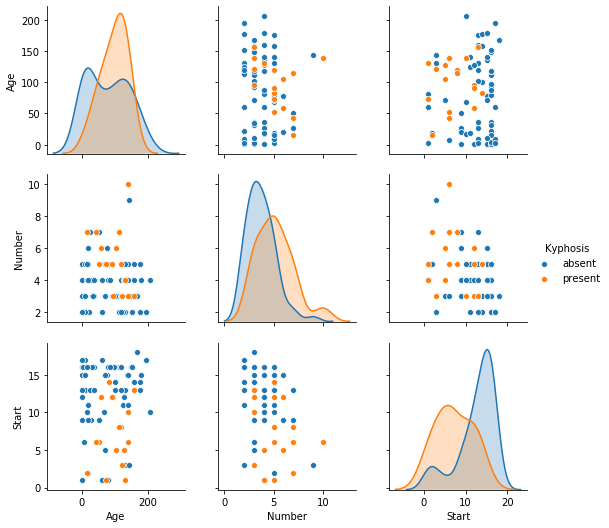

In [6]:
#Exploratory Data Analysis
sns.pairplot(data,hue='Kyphosis')

In [22]:
#train test split
from sklearn.model_selection import train_test_split

In [47]:
X = data.drop('Kyphosis',axis=1)
y = data['Kyphosis']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [49]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
#Prediction and Evaluation
predictions = dtree.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
confusion_matrix = confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)

In [55]:
confusion_matrix

array([[14,  5],
       [ 5,  1]], dtype=int64)

In [56]:
accuracy

0.6

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.74      0.74      0.74        19
     present       0.17      0.17      0.17         6

    accuracy                           0.60        25
   macro avg       0.45      0.45      0.45        25
weighted avg       0.60      0.60      0.60        25



In [ ]:
##Tree Visualization

In [58]:
#Import libraries
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [60]:
features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

In [61]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = features, filled=True,rounded=True)

In [62]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

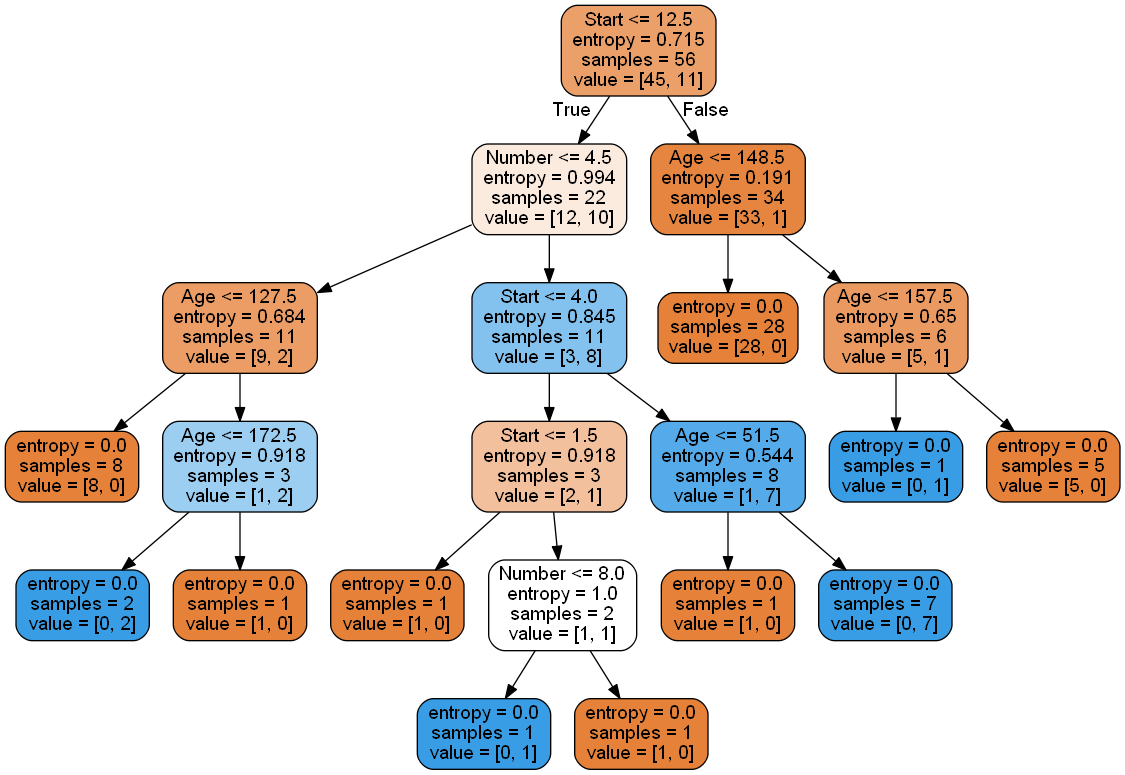

In [63]:
Image(graph[0].create_png())